In [20]:
import pandas as pd
import os
import numpy as np

In [3]:
binary = pd.read_csv(
    '../data/standardized_data/result_bin_matrix_2020_08_27.csv')

In [4]:
binary.head()

,Rv_ID,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,Rv3005c_KO_day32_vs_dejesus_H37Rv_day32,Rv3594_KO_vs_Rubin_FLUTE_WT,Rv3684_KO_vs_CB_WT,Rv3717_KO_vs_Rubin_FLUTE_WT,...,zhang_AA_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control,zhang_Fe_1.5mM_vs_zhang_Fe_450uM,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library
0,Rv0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Rv0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Rv0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Rv0004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Rv0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
binary = binary.dropna(axis=0)

In [6]:
mbio = pd.read_excel("../data/annotations/DeJesus_mbio.xlsx", header=1)
mbio.head()

,ORF ID,Name,Description,Number of TA Sites,Number of Permissive (P) Sites,Number of Non-Permissive (NP) Sites,Number of Sites Belonging to Essential State,Number of Sites Belonging to Growth-Defect State,Number of Sites Belonging to Non-Essential State,Number of Sites Belonging to Growth-Advantage State,Fraction of Sites with Insertions,Mean Normalized Read-Count At Non-Zero Sites,Final Call
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,32,29,3,31,0,1,0,0.125000,45.000000,ES
1,Rv0002,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,31,27,4,31,0,0,0,0.032258,1.000000,ES
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,35,32,3,0,0,35,0,0.857143,38.033333,NE
3,Rv0004,-,hypothetical protein,8,8,0,0,0,8,0,0.375000,144.000000,NE
4,Rv0005,gyrB,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,40,36,4,39,0,1,0,0.025000,26.000000,ES


In [7]:
print(binary.shape)
binary = pd.merge(binary, mbio[['ORF ID', 'Name', 'Description',
                                'Final Call']], how='left', left_on='Rv_ID', right_on='ORF ID')
print(binary.shape)

(3971, 65)
(3971, 69)


In [8]:
mcbwser = pd.read_excel(
    "../data/annotations/Mycobacterium_tuberculosis_H37Rv_txt_v3.xlsx")
mcbwser.head()

,Refseq_ID,Feature,Rv_ID,Name,Function,Product,Comments,Functional_Category
0,NC_000962.3,CDS,Rv3728,Rv3728,"Unknown, but seems involved in efflux system (...",Probable conserved two-domain membrane protein,"Rv3728, (MTV025.076), len: 1065 aa. Probable c...",cell wall and cell processes
1,NC_000962.3,CDS,Rv3729,Rv3729,Function unknown; probably involved in cellula...,Possible transferase,"Rv3729, (MTV025.077), len: 776 aa. Conserved h...",intermediary metabolism and respiration
2,NC_000962.3,CDS,Rv3730c,Rv3730c,Function unknown,Conserved hypothetical protein,"Rv3730c, (MTV025.078c), len: 346 aa. Conserved...",conserved hypotheticals
3,NC_000962.3,CDS,Rv3760,Rv3760,Unknown,Possible conserved membrane protein,"Rv3760, (MTV025.108), len: 100 aa. Possible co...",cell wall and cell processes
4,NC_000962.3,CDS,Rv3732,Rv3732,Function unknown,Conserved protein,"Rv3732, (MTV025.080), len: 352 aa. Conserved p...",conserved hypotheticals


In [9]:
mcbwser = mcbwser.drop_duplicates(subset=['Rv_ID'])

In [10]:
print(binary.shape)
binary = pd.merge(
    binary, mcbwser[['Rv_ID', 'Functional_Category']], how='left', on='Rv_ID')
print(binary.shape)

(3971, 69)
(3971, 70)


In [11]:
binary = binary.drop(columns='ORF ID')

In [12]:
desc_columns = ['Rv_ID', 'Name', 'Description',
                'Final Call', 'Functional_Category']
value_cols = [col for col in binary.columns if col not in desc_columns]
binary = binary[desc_columns + value_cols]

In [13]:
binary[value_cols].sum(axis=1).value_counts()

0.0     2374
1.0      692
2.0      270
3.0      154
4.0      122
5.0       67
6.0       66
7.0       49
8.0       32
10.0      24
9.0       24
11.0      21
15.0      11
12.0      10
14.0      10
13.0       8
18.0       8
16.0       6
19.0       4
20.0       3
21.0       3
17.0       3
24.0       2
25.0       2
22.0       2
28.0       1
23.0       1
27.0       1
26.0       1
dtype: int64

In [14]:
binary['all_zero'] = binary.apply(
    lambda row: 'True' if row[value_cols].sum() == 0 else 'False', axis=1)

In [15]:
binary.head()

,Rv_ID,Name,Description,Final Call,Functional_Category,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,...,zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control,zhang_Fe_1.5mM_vs_zhang_Fe_450uM,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library,all_zero
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,ES,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,Rv0002,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,ES,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,NE,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,Rv0004,-,hypothetical protein,NE,conserved hypotheticals,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
4,Rv0005,gyrB,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,ES,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True


In [16]:
from sklearn.decomposition import PCA
from plotnine import *

In [17]:
pca = PCA(3)
pca_results = pca.fit_transform(binary[value_cols])
explained_var = pca.explained_variance_
pca_df = pd.DataFrame(pca_results, columns=['pca1', 'pca2', 'pca3'])

In [18]:
binary = binary.merge(pca_df, left_index=True, right_index=True)

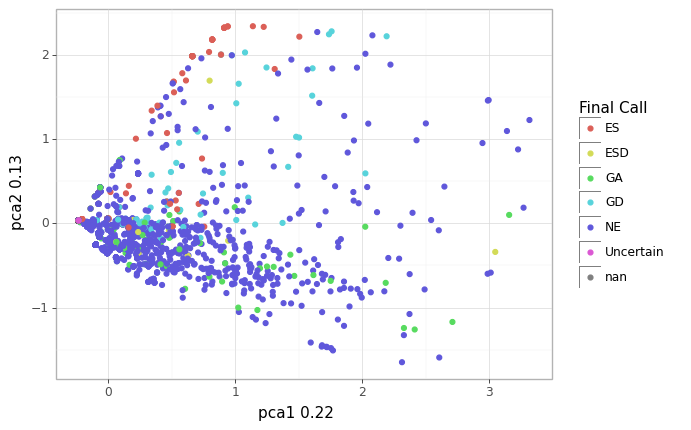

<ggplot: (8746783047829)>

In [21]:
(ggplot(binary, aes(x='pca1', y='pca2', color='Final Call'))
 + geom_point()
 + theme_light()
 + xlab(f'pca1 {np.round(explained_var[0], 2)}')
 + ylab(f'pca2 {np.round(explained_var[1], 2)}')
 )

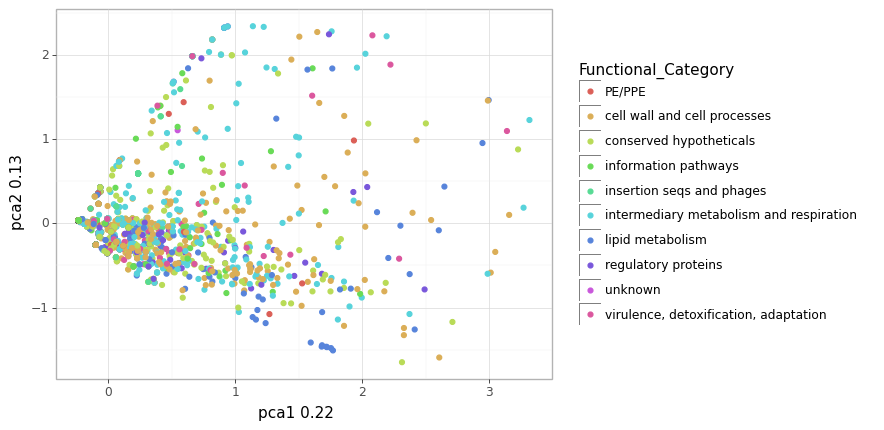

<ggplot: (8746782275661)>

In [22]:
(ggplot(binary, aes(x='pca1', y='pca2', color='Functional_Category'))
 + geom_point()
 + theme_light()
 + xlab(f'pca1 {np.round(explained_var[0], 2)}')
 + ylab(f'pca2 {np.round(explained_var[1], 2)}'))

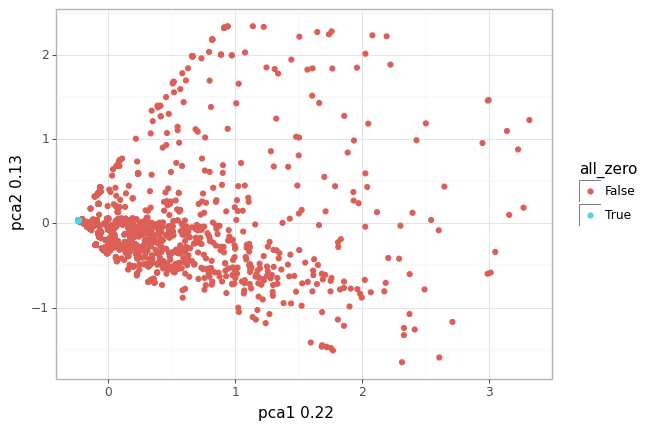

<ggplot: (8746782548021)>

In [23]:
(ggplot(binary, aes(x='pca1', y='pca2', color='all_zero'))
 + geom_point()
 + theme_light()
 + xlab(f'pca1 {np.round(explained_var[0], 2)}')
 + ylab(f'pca2 {np.round(explained_var[1], 2)}'))

In [24]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE(n_components=2).fit_transform(binary[value_cols])

In [26]:
tsne = pd.DataFrame(tsne, columns=['tsne1', 'tsne2'])

In [27]:
binary = binary.merge(tsne, left_index=True, right_index=True)

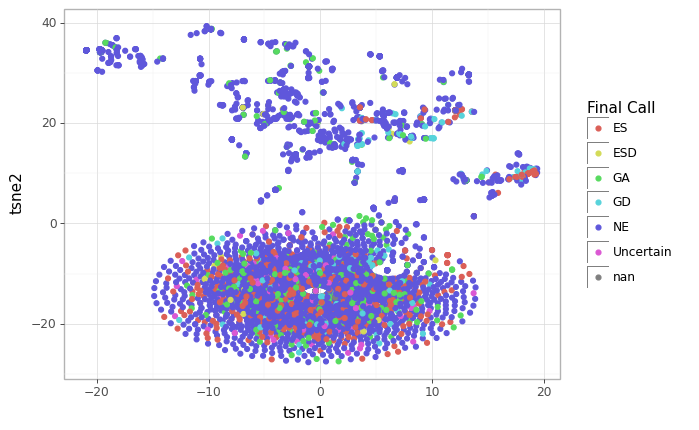

<ggplot: (8746782806673)>

In [28]:
(ggplot(binary, aes(x='tsne1', y='tsne2', color='Final Call'))+geom_point()+theme_light())

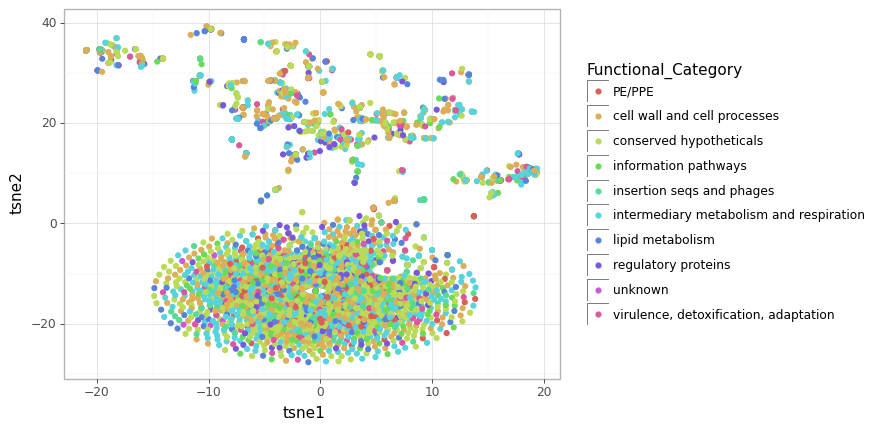

<ggplot: (8746782945213)>

In [29]:
(ggplot(binary, aes(x='tsne1', y='tsne2', color='Functional_Category')) +
 geom_point()+theme_light())

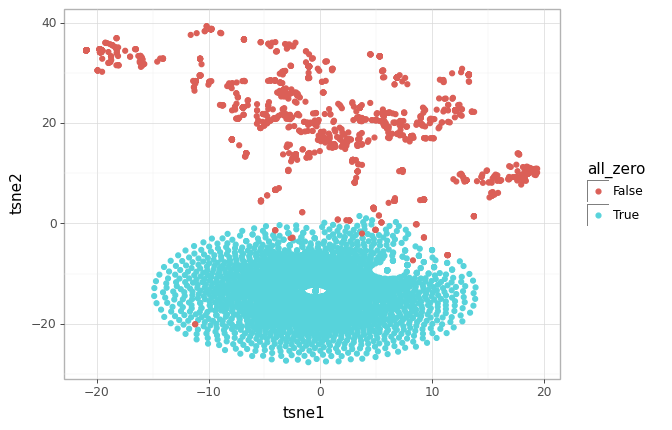

<ggplot: (8746782325241)>

In [30]:
(ggplot(binary, aes(x='tsne1', y='tsne2', color='all_zero'))+geom_point()+theme_light())

In [37]:
binary_minus_all_zeros = binary[binary.all_zero == 'False']
binary_minus_all_zeros = binary_minus_all_zeros[value_cols + desc_columns]
binary_minus_all_zeros.head()

,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,Rv3005c_KO_day32_vs_dejesus_H37Rv_day32,Rv3594_KO_vs_Rubin_FLUTE_WT,Rv3684_KO_vs_CB_WT,Rv3717_KO_vs_Rubin_FLUTE_WT,Rv3811_KO_vs_Rubin_FLUTE_WT,...,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library,Rv_ID,Name,Description,Final Call,Functional_Category
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Rv0003,recF,DNA replication and repair protein RecF (singl...,NE,information pathways
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,Rv0007,-,Possible conserved membrane protein,NE,cell wall and cell processes
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,Rv0009,ppiA,Probable iron-regulated peptidyl-prolyl cis-tr...,NE,information pathways
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Rv0012,-,Probable conserved membrane protein,NE,cell wall and cell processes
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Rv0013,trpG,Possible anthranilate synthase component II Tr...,ES,intermediary metabolism and respiration


In [38]:
tsne = TSNE(n_components=2).fit_transform(binary_minus_all_zeros[value_cols])

In [39]:
tsne = pd.DataFrame(tsne, columns=['tsne1', 'tsne2'])

In [40]:
binary_minus_all_zeros = binary_minus_all_zeros.merge(tsne, left_index=True, right_index=True)

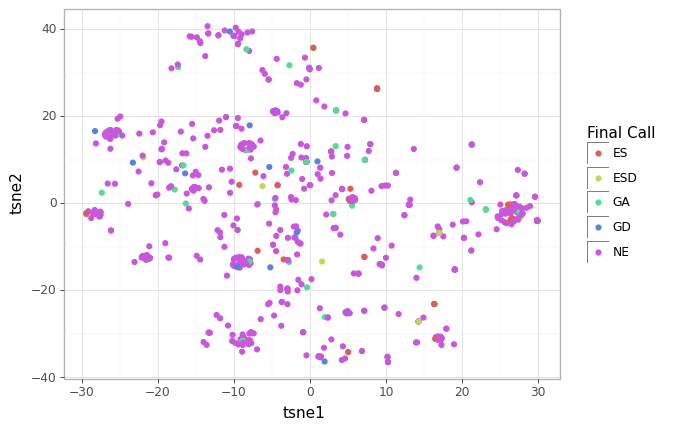

<ggplot: (8746764701937)>

In [41]:
(ggplot(binary_minus_all_zeros, aes(x='tsne1', y='tsne2', color='Final Call'))+geom_point()+theme_light())

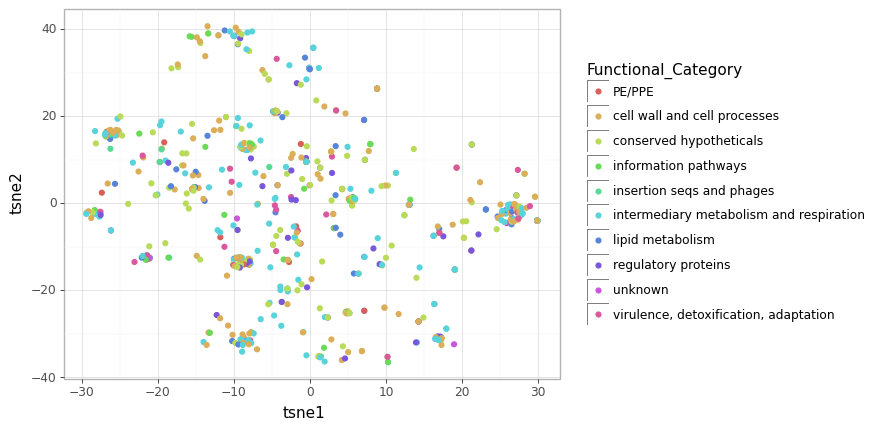

<ggplot: (8746764403705)>

In [42]:
(ggplot(binary_minus_all_zeros, aes(x='tsne1', y='tsne2', color='Functional_Category')) +
 geom_point()+theme_light())

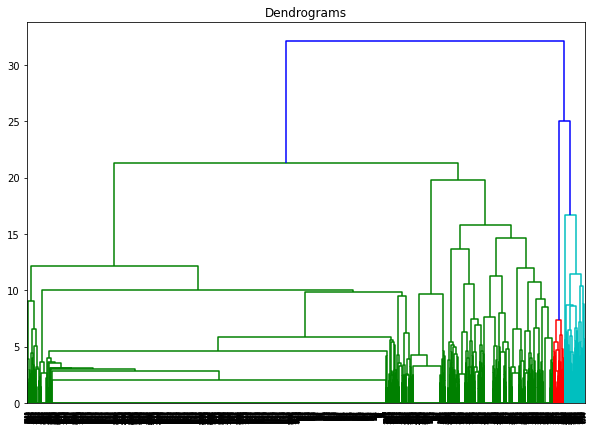

In [44]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(binary[value_cols], method='ward'))

In [45]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(
    n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(binary[value_cols])

In [46]:
binary['y_hc'] = y_hc

In [47]:
binary

,Rv_ID,Name,Description,Final Call,Functional_Category,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,...,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library,all_zero,pca1,pca2,pca3,tsne1,tsne2,y_hc
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,ES,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,-0.230892,0.034095,-0.064612,-0.427573,-13.454433,3
1,Rv0002,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,ES,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,-0.230892,0.034095,-0.064612,-0.432217,-13.452291,3
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,NE,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,0.189325,-0.292673,-0.052166,-1.081957,29.126585,3
3,Rv0004,-,hypothetical protein,NE,conserved hypotheticals,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,-0.230892,0.034095,-0.064612,-0.427631,-13.430979,3
4,Rv0005,gyrB,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,ES,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,-0.230892,0.034095,-0.064612,-0.427547,-13.431470,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,Rv3920c,-,Conserved protein similar to jag protein,NE,conserved hypotheticals,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,0.904776,0.689307,-0.377267,4.229180,16.310381,0
3967,Rv3921c,-,Probable conserved transmembrane protein,ESD,cell wall and cell processes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,-0.230892,0.034095,-0.064612,-8.030591,-15.260780,3
3968,Rv3922c,-,Possible hemolysin,NE,"virulence, detoxification, adaptation",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,-0.005283,0.052270,-0.218887,12.095080,22.602036,0
3969,Rv3923c,rnpA,Ribonuclease P protein component RnpA (RNaseP ...,NE,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,-0.230892,0.034095,-0.064612,-4.073006,-16.343555,3


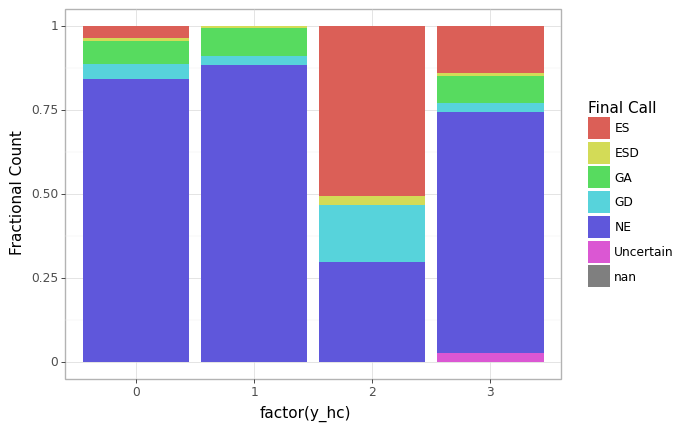

<ggplot: (8746757920109)>

In [48]:
(ggplot(binary, aes(x='factor(y_hc)'))+geom_bar(aes(fill='Final Call'),
                                                position='fill')+theme_light()+ylab('Fractional Count'))

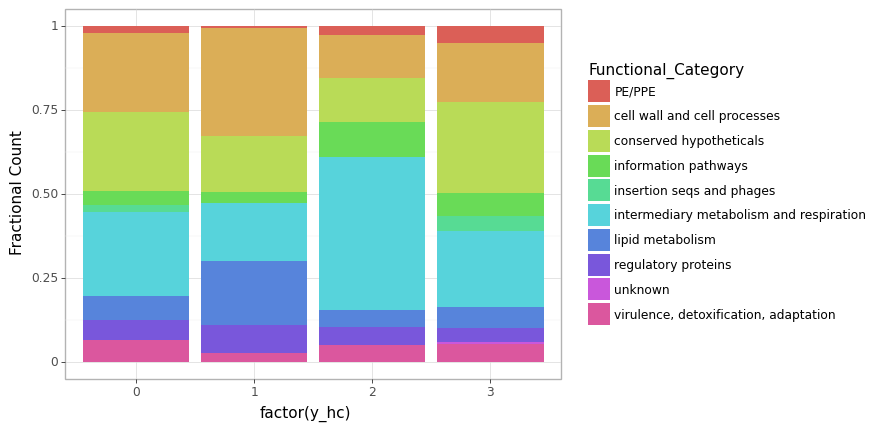

<ggplot: (8746757784801)>

In [49]:
(ggplot(binary, aes(x='factor(y_hc)'))+geom_bar(aes(fill='Functional_Category'),
                                                position='fill')+theme_light()+ylab('Fractional Count'))

In [50]:
binary.to_csv('results/clustering_binary_genes.csv', index=False)